Rachel Rathgeber
DA320 Midterm

In [1]:
import json
import pymongo
import certifi
import pandas

#retrieve credentials for sql server from credentials file
with open('/Users/rachelrathgeber/Documents/DA320/credentials.json') as f:
    data = json.load(f)
    mongo_connection_string = data['mongodb']

#fetch the database
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())
da320_database = client['DA320']
metacritic_data = da320_database['metacritic']
metacritic = pandas.DataFrame(metacritic_data.find())

In [2]:
#convert release dates into actual dates and gather year/month

metacritic.release_date = pandas.to_datetime(metacritic.release_date)
metacritic['year'] = metacritic.release_date.dt.year
metacritic['month'] = metacritic.release_date.dt.month
metacritic.metascore = pandas.to_numeric(metacritic.metascore)
metacritic.head()

,_id,title,release_date,description,metascore,imgage_url,year,month
0,636d9d35c03e4363483c1cab,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,636d9d35c03e4363483c1cac,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,636d9d35c03e4363483c1cad,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,636d9d35c03e4363483c1cae,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,636d9d35c03e4363483c1caf,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


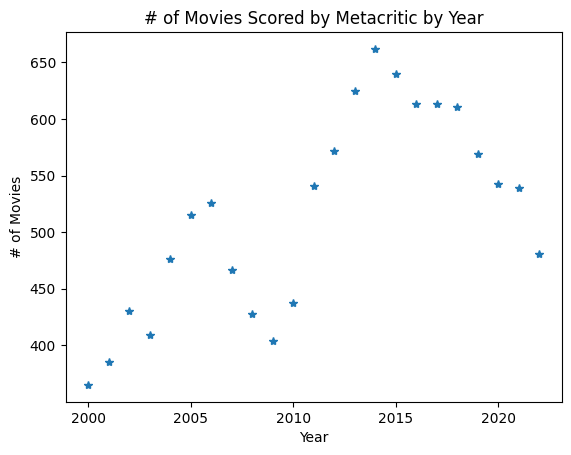

In [3]:
#creating a scatter plot with the data form Metacritic

from matplotlib import pyplot
from matplotlib.ticker import FormatStrFormatter

#creating labels for the axis
pyplot.title('# of Movies Scored by Metacritic by Year')
pyplot.xlabel('Year')
pyplot.ylabel('# of Movies')

#counting the # of movies Metacritic scored by year and plotting the results
df = metacritic['release_date'].groupby(metacritic.year).agg('count')
pyplot.plot(df, '*')
pyplot.show()


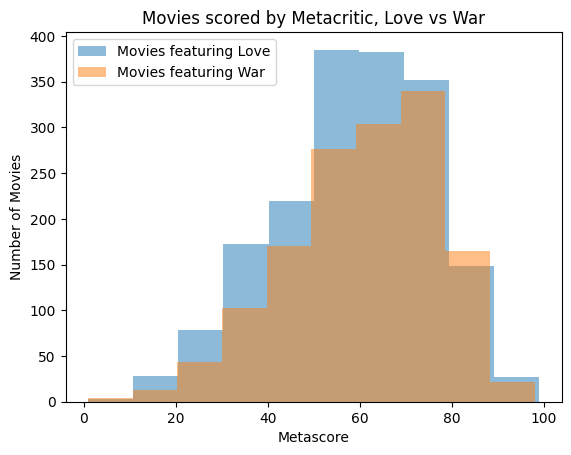

In [8]:
from matplotlib import pyplot

#retrieving metscore for movies with war or love in the description
scores_love = metacritic[metacritic['description'].str.contains("love")].metascore
scores_war = metacritic[metacritic['description'].str.contains("war")].metascore

#plotting into bins
pyplot.title("Movies scored by Metacritic, Love vs War")
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.hist(scores_love, alpha=0.5, label='Movies featuring Love')
pyplot.hist(scores_war, alpha=0.5, label='Movies featuring War')
pyplot.legend(loc='upper left')
pyplot.show()

